# Correct PINNs Prediction with FEM and $\phi$-FEM

Maillage standard créé avec la levelset 

+Interpolation solution sur maillage surraffinée

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [7]:
import os
import shutil

In [8]:
from scimba.equations.domain import SpaceTensor
from scar.problem.Case import *
from scar.equations.Poisson2D import *
from scar.utils import read_config,create_tree
from scar.equations.run_Poisson2D import *

from scar.solver.solver_fem import *
from scar.solver.solver_phifem import *
from scar.correction.correct_pred import *

## Define case

In [9]:
config = 1
casefile = "../../testcases/"+"lap_cat_2.json"

cas = Case(casefile)
problem_considered = cas.problem
pde_considered = cas.pde
form_considered = cas.form

type = 0 # help="0 - all ; 1 - add ; 2 - add IPP ; 3 - mult"

dir_name = "../../"+cas.dir_name
models_dir = dir_name+"models/"
config_filename = models_dir+"config_"+str(config)+".json"
corr_type = cas.corr_type
corr_dir = "../../"+cas.corr_dir_name
create_tree(corr_dir)
# don't show plots
plt.close()
plt.close()

bc_points.shape = (2000, 2), bc_normals.shape = (2000, 2)
>> load network /home/flecourtier/Bureau/Thèse/networks/EikonalLap2D/Cat/models/model_2.pth
jsbdbshd


In [10]:
form_trainer = cas.sd_function.form_trainer
phi_theta = cas.sd_function.eik_pinns

config_dict = read_config(config_filename)
trainer = run_Poisson2D(cas,config,config_dict)
u_theta = trainer.network
plt.close()

Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
>> load network /home/flecourtier/Bureau/Thèse/networks/Poisson2D/Cat/SDEikonalLap/ConstantForce/form_2/0.0/models/model_1.pth
jsbdbshd
network loaded


## Correction

In [11]:
mesh_dir = str(current / "networks" / "EikonalLap2D" / form_considered.__class__.__name__ / "meshes")+"/"
if os.path.exists(mesh_dir):
    shutil.rmtree(mesh_dir)

In [12]:
if trainer.pde.nb_parameters == 0:
    params = [[None,None,None]]
else:
    mu = torch.mean(trainer.pde.parameter_domain, axis=1)
    S,f,p = mu.numpy()
    params = [[S,f,p]]

nb_vert = 32
deg_corr = 10

### Avec FEM

In [13]:
solver = FEMSolver(nb_cell=nb_vert-1, params=params, cas=cas)

# get differents solutions
analytical = problem_considered.analytical_sol
if analytical:
    u_ex = UexExpr(params[0], degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
else:
    mesh_ex,V_ex,u_ex = problem_considered.u_ref(form_trainer,mesh_dir)

hmin =  0.018247916933846434
hmax =  0.09123958466923217
mmg2d_O3 -nr -hmin 0.018247916933846434 -hmax 0.09123958466923217 -hausd 0.0018247916933846434 -ls -sol /tmp/tmpldqf6dne/Th.solb /tmp/tmpldqf6dne/Th.meshb
  -- MMG2D, Release 5.7.0 (Dec. 13, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 12 2024 16:58:31

  -- INPUT DATA
  %% /tmp/tmpldqf6dne/Th.meshb OPENED
  %% /tmp/tmpldqf6dne/Th.solb OPENED
  -- DATA READING COMPLETED.     0.004s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.0 (Dec. 13, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: master
     git commit: b8995360a4c5b894949c08b1bba90750a2062a7a
     git date:   2024-01-30 11:43:38 +0100


  -- MMG2DLS: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : ISOSURFACE DISCRETIZATION

  -- MESH QUALITY   20000
     BEST   0.866025  AVRG.   0.866025  WRST.   0.866025 (7)
     HISTOGRAMM:  100.00 % > 0.12
  *** Manifold i

discarding line.


Reading mesh from file
hmin =  0.004561979233461608
hmax =  0.022809896167308042
mmg2d_O3 -nr -hmin 0.004561979233461608 -hmax 0.022809896167308042 -hausd 0.00045619792334616085 -ls -sol /tmp/tmpjgcezz99/Th.solb /tmp/tmpjgcezz99/Th.meshb
  -- MMG2D, Release 5.7.0 (Dec. 13, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 12 2024 16:58:31

  -- INPUT DATA
  %% /tmp/tmpjgcezz99/Th.meshb OPENED
  %% /tmp/tmpjgcezz99/Th.solb OPENED
  -- DATA READING COMPLETED.     0.008s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.0 (Dec. 13, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: master
     git commit: b8995360a4c5b894949c08b1bba90750a2062a7a
     git date:   2024-01-30 11:43:38 +0100


  -- MMG2DLS: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : ISOSURFACE DISCRETIZATION

  -- MESH QUALITY   20000
     BEST   0.866025  AVRG.   0.866025  WRST.   0.866025 (7)
     HISTOGRAMM:  100.00

discarding line.


Reading mesh from file
hmin,hmax : 0.002280989616730804 0.011404948083654021
h,h_macro : 0.06361796388617483 0.09123958466923217
hmin =  0.001
hmax =  0.005
mmg2d_O3 -nr -hmin 0.001 -hmax 0.005 -hausd 0.0001 -ls -sol /tmp/tmpfe76655t/Th.solb /tmp/tmpfe76655t/Th.meshb
  -- MMG2D, Release 5.7.0 (Dec. 13, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 12 2024 16:58:31

  -- INPUT DATA
  %% /tmp/tmpfe76655t/Th.meshb OPENED
  %% /tmp/tmpfe76655t/Th.solb OPENED
  -- DATA READING COMPLETED.     0.004s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.0 (Dec. 13, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: master
     git commit: b8995360a4c5b894949c08b1bba90750a2062a7a
     git date:   2024-01-30 11:43:38 +0100


  -- MMG2DLS: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : ISOSURFACE DISCRETIZATION

  -- MESH QUALITY   20000
     BEST   0.866025  AVRG.   0.866025  WRST.   0.86602

discarding line.


       102488 splitted,      828 collapsed,    13421 swapped, 5 iter.

  -- GRADATION : 1.300000 (2.300000)
          427 splitted,      301 collapsed,      383 swapped, 3 iter.
        17174 splitted,   119373 collapsed,    15334 swapped,   240029 moved, 4 iter. 
  -- PHASE 3 COMPLETED.     0.895s

  -- MESH QUALITY   96973
     BEST   1.000000  AVRG.   0.953578  WRST.   0.643380 (66453)
     HISTOGRAMM:  100.00 % > 0.12

  -- MESH PACKED UP
     NUMBER OF VERTICES          48885   CORNERS        4
     NUMBER OF TRIANGLES         96973
     NUMBER OF EDGES              2241

   MMG2DLS: ELAPSED TIME  0.911s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   END OF MODULE MMG2D
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


  -- WRITING DATA FILE /tmp/tmpfe76655t/Th.o.meshb
  %% /tmp/tmpfe76655t/Th.o.meshb OPENED
  %% /tmp/tmpfe76655t/Th.o.sol OPENED
  -- WRITING COMPLETED

   ELAPSED TIME  0.931s

Finished in (0.95s)
Truncating mesh from region 3


discarding line.


Reading mesh from file


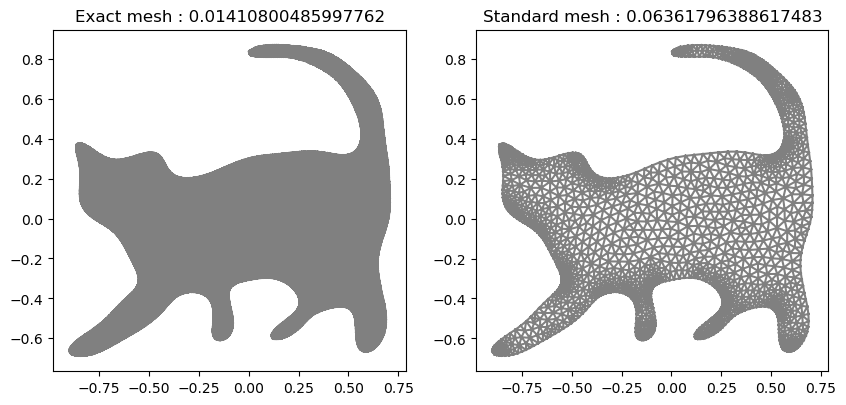

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plot(mesh_ex)
plt.title("Exact mesh : "+str(mesh_ex.hmax()))

plt.subplot(1,2,2)
plot(solver.mesh)
plt.title("Standard mesh : "+str(solver.mesh.hmax()))
plt.show()

Get u_PINNs on Vex
Building point search tree to accelerate distance queries.
Computed bounding box tree with 61383 nodes for 30692 points.
Get u_PINNs
Get u_Corr
Object cannot be plotted directly, projecting to piecewise linears.


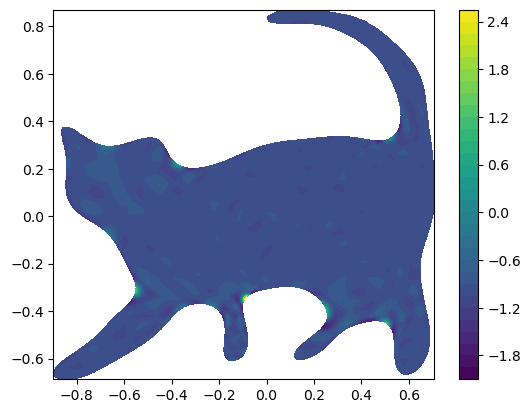

Building point search tree to accelerate distance queries.
Computed bounding box tree with 6097 nodes for 3049 points.
Get u_FEM


In [15]:
if analytical:
    u_PINNs, norm_L2_PINNs = get_u_PINNs(trainer,solver,deg_corr,get_error=True,analytical_sol=analytical)
    u_Corr,C,norm_L2_Corr = correct_pred(solver,u_PINNs,corr_type,analytical_sol=analytical)
    u_FEM,norm_L2_FEM = solver.fem(0,analytical_sol=analytical)
else:
    print("Get u_PINNs on Vex")
    
    XXYY = V_ex.tabulate_dof_coordinates()
    X_test,mu_test = create_test_sample(XXYY, trainer.pde.parameter_domain)

    pred = u_theta.setup_w_dict(X_test, mu_test)
    phi_tild = pred["w"][:,0].cpu().detach().numpy()
    u_PINNs_Vex = Function(V_ex)
    u_PINNs_Vex.vector()[:] = phi_tild.copy()
    norm_L2_PINNs = (assemble((((u_ex - u_PINNs_Vex)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))
    
    print("Get u_PINNs")

    u_PINNs, _ = get_u_PINNs(trainer,solver,deg_corr,get_error=False,analytical_sol=analytical)
    
    print("Get u_Corr")

    u_Corr,C,_ = correct_pred(solver,u_PINNs,corr_type,get_error=False,analytical_sol=analytical)
    C_inter = interpolate(C, V_ex)
    # u_Corr_inter = project(u_Corr, solver.V)
    # u_Corr_inter = interpolate(u_Corr_inter, V_ex)
    u_Corr_inter = Function(V_ex)
    u_Corr_inter.vector()[:] = u_PINNs_Vex.vector().copy()[:] + C_inter.vector().copy()[:]
    norm_L2_Corr = (assemble((((u_ex - u_Corr_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

    print("Get u_FEM")

    u_FEM,_ = solver.fem(0,get_error=False,analytical_sol=analytical)
    u_FEM_inter = interpolate(u_FEM, V_ex)
    norm_L2_FEM = (assemble((((u_ex - u_FEM_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

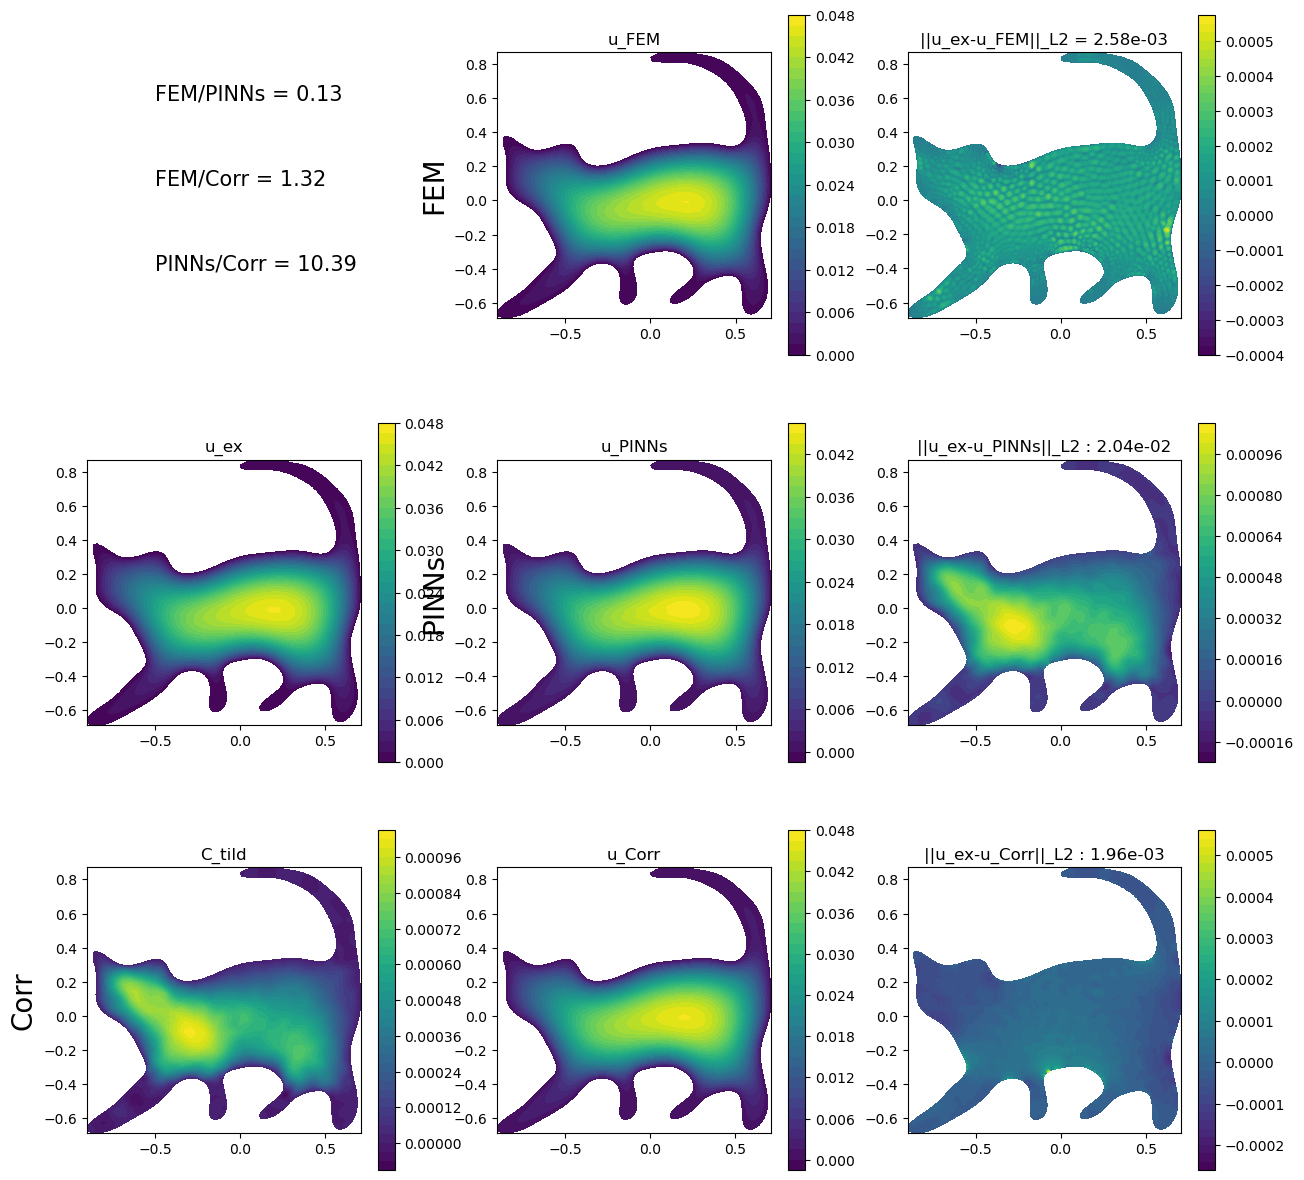

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)

plt.text(0.2,0.75,"FEM/PINNs = {:.2f}".format(norm_L2_FEM/norm_L2_PINNs),fontsize=15)
plt.text(0.2,0.5,"FEM/Corr = {:.2f}".format(norm_L2_FEM/norm_L2_Corr),fontsize=15)
plt.text(0.2,0.25,"PINNs/Corr = {:.2f}".format(norm_L2_PINNs/norm_L2_Corr),fontsize=15)
plt.axis('off')

# FEM
plt.subplot(3,3,2)
c = plot(u_FEM, title="u_FEM")
plt.ylabel("FEM", fontsize=20)
plt.colorbar(c)

plt.subplot(3,3,3)
error = Function(V_ex)
error.vector()[:] = u_ex.vector().copy()[:] - u_FEM_inter.vector().copy()[:]
c = plot(error, title="||u_ex-u_FEM||_L2 = {:.2e}".format(norm_L2_FEM))
plt.colorbar(c)

plt.subplot(3,3,4)
c = plot(u_ex, title="u_ex")
plt.colorbar(c)

plt.subplot(3,3,5)
c = plot(u_PINNs, title="u_PINNs")
plt.ylabel("PINNs", fontsize=20)
plt.colorbar(c)

plt.subplot(3,3,6)
error = Function(V_ex)
error.vector()[:] = u_ex.vector().copy()[:] - u_PINNs_Vex.vector().copy()[:]
# error = project(error,project_on)
c = plot(error, title="||u_ex-u_PINNs||_L2 : {:.2e}".format(norm_L2_PINNs))
plt.colorbar(c)

# Corr
plt.subplot(3,3,7)
c = plot(C_inter, title="C_tild")
plt.ylabel("Corr", fontsize=20)
plt.colorbar(c) 

plt.subplot(3,3,8)
c = plot(u_Corr_inter, title="u_Corr")
plt.colorbar(c)

plt.subplot(3,3,9)
error = Function(V_ex)
error.vector()[:] = u_ex.vector().copy()[:] - u_Corr_inter.vector().copy()[:]
# error = u_ex-project(u_Corr,project_on)
c = plot(error, title="||u_ex-u_Corr||_L2 : {:.2e}".format(norm_L2_Corr))
plt.colorbar(c)

FEM_dir = corr_dir+"FEM"+"/"
if not os.path.exists(FEM_dir):
    os.makedirs(FEM_dir)
plt.savefig(FEM_dir+"corr_"+"FEM"+"_"+str(config)+".png")

### Avec PhiFEM

In [ ]:
solver = PhiFemSolver(nb_cell=nb_vert-1, params=params, cas=cas)

# get differents solutions
analytical = problem_considered.analytical_sol
if analytical:
    u_ex = UexExpr(params[0], degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
    u_PINNs, norm_L2_PINNs = get_u_PINNs(trainer,solver,deg_corr,get_error=True,analytical_sol=analytical)
    u_Corr,C,norm_L2_Corr = correct_pred(solver,u_PINNs,corr_type,analytical_sol=analytical)
    u_FEM,norm_L2_FEM = solver.fem(0,analytical_sol=analytical)
else:
    mesh_dir = dir_name + "meshes/"
    mesh_ex,V_ex,u_ex = problem_considered.u_ref(form_trainer,mesh_dir)

    # print("Get u_PINNs")

    u_PINNs, _ = get_u_PINNs(trainer,solver,deg_corr,get_error=False,analytical_sol=analytical)
    # u_PINNs_inter = interpolate(u_PINNs_inter, V_ex)
    norm_L2_PINNs = (assemble((((u_ex - u_PINNs)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))
    
    print("Get u_Corr")

    u_Corr,C,_ = correct_pred(solver,u_PINNs,corr_type,get_error=False,analytical_sol=analytical)
    u_Corr_inter = project(u_Corr, solver.V)
    u_Corr_inter = interpolate(u_Corr_inter, V_ex)
    norm_L2_Corr = (assemble((((u_ex - u_Corr_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

    print("Get u_FEM")

    u_FEM,_ = solver.fem(0,get_error=False,analytical_sol=analytical)
    u_FEM_inter = interpolate(u_FEM, V_ex)
    norm_L2_FEM = (assemble((((u_ex - u_FEM_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

# # get differents solutions
# analytical = problem_considered.analytical_sol
# if analytical:
#     u_ex = UexExpr(params[0], degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
# else:
#     u_ex = problem_considered.u_ref()
# u_PINNs, norm_L2_PINNs = get_u_PINNs(trainer,solver,deg_corr, get_error=True,analytical_sol=analytical)
# print("u_PINNs : ",norm_L2_PINNs)
# u_Corr,C,norm_L2_Corr = correct_pred(solver,u_PINNs,corr_type,analytical_sol=analytical)
# print("u_Corr : ",norm_L2_Corr)
# u_FEM,norm_L2_FEM = solver.fem(0,analytical_sol=analytical)
# print("u_FEM : ",norm_L2_FEM)

num of cell in the ghost penalty: 124
Reading new mesh from file


/home/flecourtier/Bureau/Thèse/src/scar/geometry/Geometry2D.py:154: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400441250/work/torch/csrc/utils/tensor_new.cpp:261.)
  return self.R()@torch.Tensor([x,y])


Building point search tree to accelerate distance queries.
Get u_Corr
Computed bounding box tree with 40903 nodes for 20452 points.


TypeError: corr_add() got an unexpected keyword argument 'get_error'

Building point search tree to accelerate distance queries.
Computed bounding box tree with 14569 nodes for 7285 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


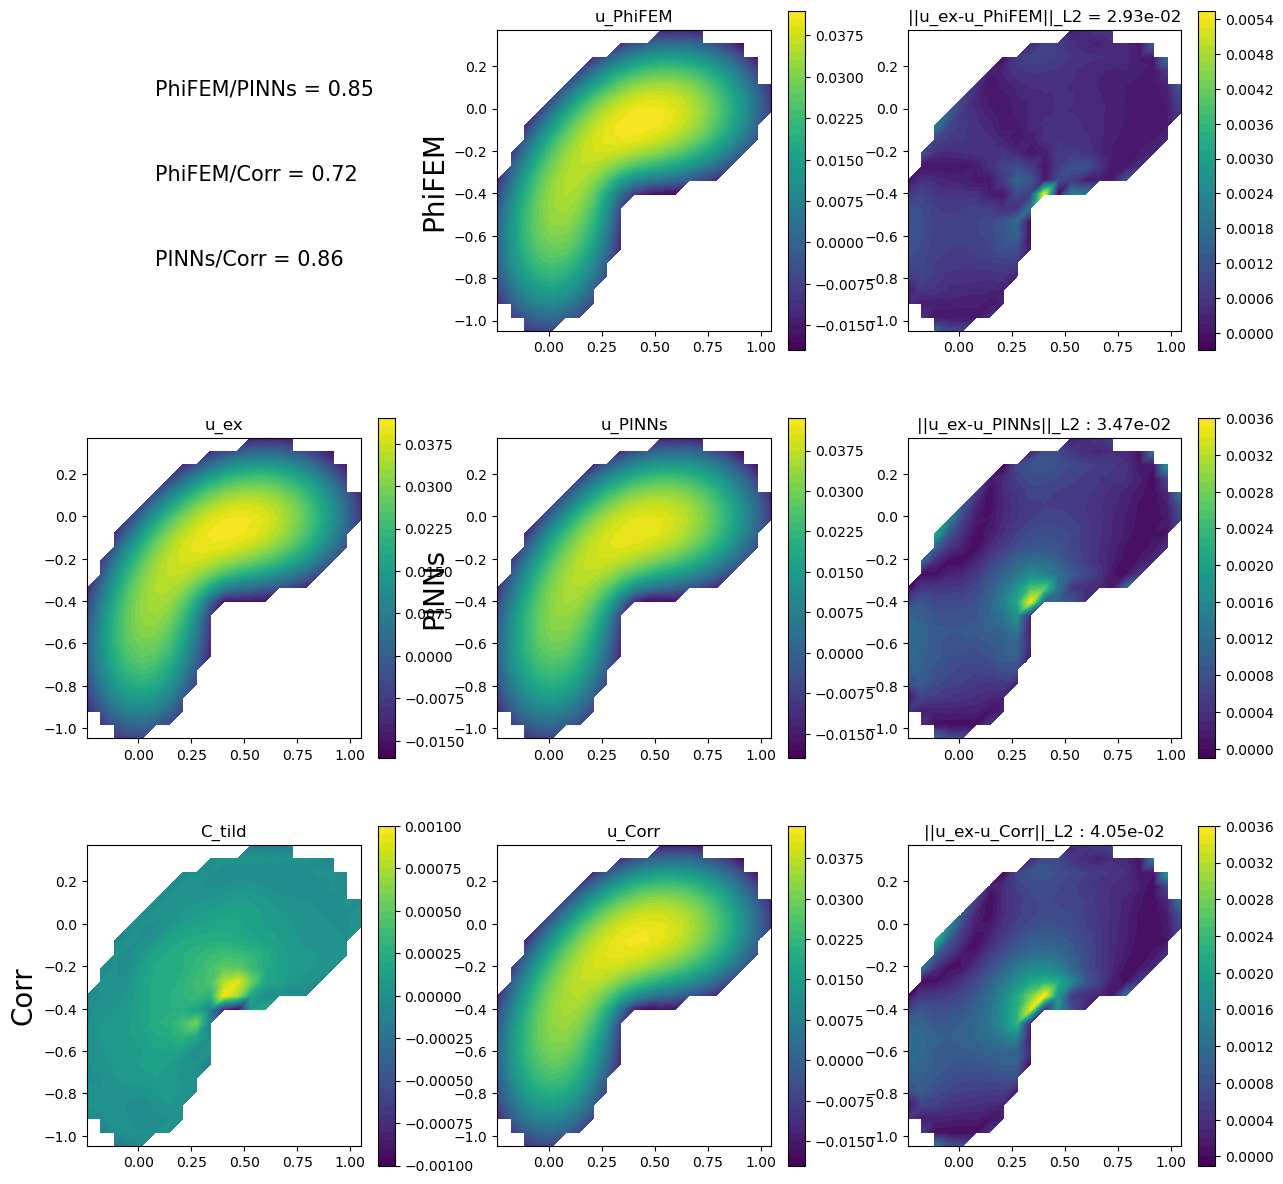

In [ ]:
# plot
u_ex = project(u_ex, solver.V)

solutions = [u_PINNs,u_Corr,u_FEM]
normes = [norm_L2_PINNs,norm_L2_Corr,norm_L2_FEM]

plot_sol(corr_dir,config,"PhiFEM",u_ex,C,solutions,normes,solver.V)

Projection sur $\Omega$ :

Building point search tree to accelerate distance queries.
Computed bounding box tree with 973 nodes for 487 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


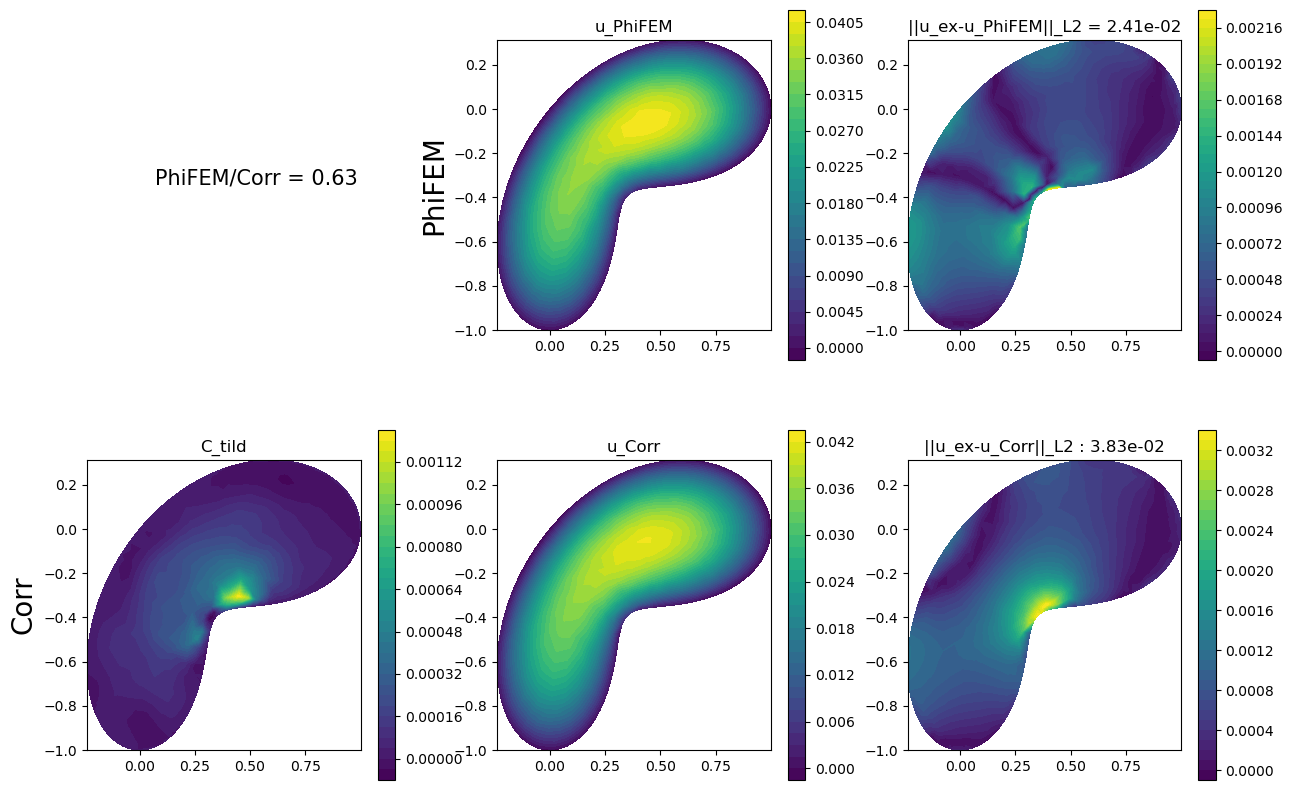

In [ ]:
# project u_ex on Omega
u_ex_Omega = project(u_ex, solver.V_ex)

# project u_Corr on Omega
u_Corr_ = project(u_Corr, solver.V)
u_Corr_Omega = project(u_Corr_, solver.V_ex)    
norm_L2_Corr_Omega = (assemble((((u_ex_Omega - u_Corr_Omega)) ** 2) * solver.dx_ex) ** (0.5)) / (assemble((((u_ex_Omega)) ** 2) * solver.dx_ex) ** (0.5))

# project u_FEM on Omega
u_FEM_ = project(u_FEM, solver.V)
u_FEM_Omega = project(u_FEM_, solver.V_ex)

norm_L2_FEM_Omega = (assemble((((u_ex_Omega - u_FEM_Omega)) ** 2) * solver.dx_ex) ** (0.5)) / (assemble((((u_ex_Omega)) ** 2) * solver.dx_ex) ** (0.5))


#####
# Plot !
#####

solutions = [u_Corr_Omega,u_FEM_Omega]
normes = [norm_L2_Corr_Omega,norm_L2_FEM_Omega]
# plot_sol(corr_type,"PhiFEM",u_ex_Omega,solutions,normes,solver.V_ex,project_on_Omega=True)
plot_sol(corr_dir,config,"PhiFEM",u_ex_Omega,C,solutions,normes,solver.V_ex,project_on_Omega=True)